# Binary Gravity Advanced: PostNewtonian terms

This Python code simulates the motion of two massive objects due to their mutual gravitational attraction. The code uses the `solve_ivp` function from the `scipy.integrate` module to numerically solve the equations of motion for the system. The equations of motion are given by Newton's second law and take into account the gravitational force between the objects. 

The code considers the Post-Newtonian terms, which are corrections to the Newtonian approximation due to the effects of general relativity. These terms are small and only become significant when the objects are moving at high speeds and/or are close to each other.

The simulation plots the motion of the two objects in two dimensions using `matplotlib`. The initial conditions for the simulation are defined by the `initial_conditions` function, which sets the positions and velocities of the two objects. The simulation runs for a specified time interval, set by the `time_settings` function.

The simulation results are plotted using `matplotlib`. The `setup_plot` function sets up the plot with appropriate axis limits, labels, and formatting. The `update` function is called by the `FuncAnimation` class to update the plot for each frame of the animation.

Overall, this code provides a simple but powerful way to simulate the motion of two massive objects under the influence of gravity, including the effects of general relativity.

In [1]:
# Enable interactive plot
%matplotlib notebook

The purpose of this code is to simulate the gravitational interaction between two celestial bodies. The code uses the `numpy` and `matplotlib` libraries for numerical computations and visualizations, respectively. The `scipy.integrate` module is also used to solve the differential equations that describe the motion of the bodies.

The `G` and `c` constants are the gravitational constant and the speed of light, respectively. `M1` and `M2` are the masses of the two objects.

The simulation of the motion of the two objects can be visualized using an animation, which can be created using the `matplotlib.animation` module. The `FuncAnimation` function is used to create the animation by repeatedly calling a function that updates the positions of the objects.

The `solve_ivp` function from the `scipy.integrate` module is used to solve the differential equations that describe the motion of the two objects. The function takes in the differential equations, initial conditions, and the time interval over which to solve the equations. The resulting trajectory of the objects can then be plotted using the `matplotlib.pyplot` module.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import solve_ivp

# Constants
G = 6.67430e-11  # Gravitational constant (m^3/kg/s^2)
c = 3.0e8        # Speed of light (m/s)
M1 = 1.989e30    # Mass of the first object (kg)
M2 = 5.972e24    # Mass of the second object (kg)

## First Post-Newtonian Order Equations of Motion

In this code, we implement the equations of motion for two massive bodies interacting with each other due to their gravitational attraction. We take into account the first post-Newtonian (1PN) correction, which is the first term in a perturbation series beyond the Newtonian approximation.

The positions and velocities of the two bodies are represented as a 12-component vector y, where the first 6 components correspond to the first body and the next 6 components correspond to the second body. The equations of motion for this system can be expressed as:

$$\frac{dy}{dt} = f(t, y)$$

where $y = [x1, v1, x2, v2]$ is the vector of positions and velocities, and $f(t, y)$ is the vector of accelerations.

We calculate the acceleration due to the gravitational force between the two bodies, taking into account the 1PN correction term. The acceleration of the $i$-th body due to the gravitational force from the $j$-th body is given by:

$$\mathbf{a}_{i, \text{grav}} = -\frac{G m_j}{r_{ij}^3} \mathbf{r}_{ij}$$

where $G$ is the gravitational constant, $m_j$ is the mass of the $j$-th body, $\mathbf{r}_{ij}$ is the vector from the $j$-th body to the $i$-th body, and $r_{ij}$ is the magnitude of this vector.

The 1PN correction term is given by:

$$\mathbf{a}_{i, 1PN} = \frac{G m_j}{c^2 r_{ij}^3} \left[(4G m_i r_{ij}^{-1} - v_i^2 - v_j^2)\mathbf{r}_{ij} - 2(\mathbf{v}_i - \mathbf{v}_j)\cdot\mathbf{r}_{ij} (\mathbf{v}_i)\right]$$

where $c$ is the speed of light, $m_i$ is the mass of the $i$-th body, $v_i$ and $v_j$ are the velocities of the $i$-th and $j$-th bodies respectively, and $\mathbf{r}_{ij}$ is the vector from the $j$-th body to the $i$-th body.

We then combine the gravitational and 1PN acceleration terms to obtain the total acceleration of each body. These accelerations are used to update the positions and velocities of the bodies at each time step using a numerical integrator.

Note that in this implementation, we assume that the masses of the two bodies are much smaller than the total mass of the system, so that the motion can be treated as a two-body problem.


In [3]:
def equations_of_motion_1PN(t, y):
    """
    Calculate the equations of motion for a binary system with 1PN correction.

    Args:
        t (float): Time.
        y (numpy.ndarray): Array containing the positions and velocities of the two objects.

    Returns:
        numpy.ndarray: Array containing the velocities and accelerations of the two objects.
    """

    # Separate position and velocity arrays for the two objects
    pos1 = y[[0, 2, 4]]
    vel1 = y[[1, 3, 5]]
    pos2 = y[[6, 8, 10]]
    vel2 = y[[7, 9, 11]]

    # Calculate the relative position and distance between the two objects
    r_vector = pos1 - pos2
    r = np.linalg.norm(r_vector)

    # Calculate the Newtonian acceleration for each object
    acceleration1_newtonian = -G * M2 * r_vector / r**3
    acceleration2_newtonian = G * M1 * r_vector / r**3

    # Calculate the 1PN correction terms for each object
    vel_squared_sum = np.sum(vel1**2) + np.sum(vel2**2)
    vel_dot_r = np.dot(vel1, r_vector) - np.dot(vel2, r_vector)
    acceleration1_1PN = G * M2 / (c**2 * r**3) * (
        (4 * G * M1 / r - vel_squared_sum) * r_vector - 2 * vel_dot_r * vel1)
    acceleration2_1PN = G * M1 / (c**2 * r**3) * (
        (4 * G * M2 / r - vel_squared_sum) * r_vector + 2 * vel_dot_r * vel2)

    # Combine the Newtonian and 1PN acceleration terms for each object
    acceleration1 = acceleration1_newtonian + acceleration1_1PN
    acceleration2 = acceleration2_newtonian + acceleration2_1PN

    # Combine the velocity and acceleration arrays for each object into a single array
    dy_dt = np.empty_like(y)
    dy_dt[[0, 2, 4]] = vel1
    dy_dt[[1, 3, 5]] = acceleration1
    dy_dt[[6, 8, 10]] = vel2
    dy_dt[[7, 9, 11]] = acceleration2

    return dy_dt

## Solving the Two-Body Problem

The initial conditions for the system are given by the positions and velocities of the two objects at some initial time $t_0$. In this code, we define the initial conditions for the system using the function `initial_conditions`, which sets the initial positions and velocities for the two objects.

We also need to specify the time span over which we want to solve the system, as well as the times at which we want to evaluate the solution. These are defined using the function `time_settings`.

Finally, we solve the system of differential equations using the function `solve_system`, which calls the `solve_ivp` function from the `scipy.integrate` module. This function uses a fourth-order Runge-Kutta method to numerically integrate the equations of motion and return the solution.

Overall, this code provides a way to solve the two-body problem and obtain the trajectories of two objects as they move under the influence of gravity.

In [4]:
def initial_conditions():
    """Returns a list of initial conditions for a two-body system.

    Returns:
    -------
    list
        A list of initial conditions for the two-body system in the order:
        x1, vx1, y1, vy1, z1, vz1, x2, vx2, y2, vy2, z2, vz2
    """
    x1, vx1, y1, vy1, z1, vz1 = 0, 0, 0, 0, 0, 0
    x2, vx2, y2, vy2, z2, vz2 = 1.496e11, 0, 0, 29.29e3, 0, 0
    return [x1, vx1, y1, vy1, z1, vz1, x2, vx2, y2, vy2, z2, vz2]


def time_settings():
    """Returns the time span and evaluation points for the two-body system.

    Returns:
    -------
    tuple, ndarray
        A tuple containing the time span (t_span) as a tuple of start and end times,
        and an ndarray of time points (t_eval) for evaluating the solution.
    """
    t_span = (0, 1e8)
    t_eval = np.linspace(t_span[0], t_span[1], int(1e4))
    return t_span, t_eval


def solve_system(t_span, initial_conditions, t_eval, eq_motion):
    """Solves the equations of motion for a two-body system.

    Parameters:
    ----------
    t_span : tuple
        A tuple containing the start and end times of the integration.
    initial_conditions : list
        A list of initial conditions for the two-body system.
    t_eval : ndarray
        An ndarray of time points for evaluating the solution.
    eq_motion : function
        A function that defines the equations of motion for the system.

    Returns:
    -------
    scipy.integrate.OdeSolution
        A solution object containing the time and state vectors for the system.
    """
    solution = solve_ivp(eq_motion, t_span, initial_conditions, 
                         method='RK45', t_eval=t_eval)
    return solution

## Representation

In [5]:
def animate_solution(solution):
    """
    Animates the solution of a 3D problem with two moving points.

    Parameters
    ----------
    solution : ODE solution object
        Solution of the 3D problem containing the trajectories of the two points.

    Returns
    -------
    None
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x1, y1, z1 = solution.y[0], solution.y[2], solution.y[4]
    x2, y2, z2 = solution.y[6], solution.y[8], solution.y[10]

    point1, = ax.plot([], [], [], 'ro', label='M1', markersize=10)
    point2, = ax.plot([], [], [], 'bo', label='M2', markersize=8)

    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.set_zlabel('Z (m)')

    ax.set_xlim(np.min([x1, x2]), np.max([x1, x2]))
    ax.set_ylim(np.min([y1, y2]), np.max([y1, y2]))
    ax.set_zlim(np.min([z1, z2])-0.1, np.max([z1, z2])+0.1)

    ax.legend()

    def init():
        """
        Initializes the plot by setting the data to empty arrays.

        Returns
        -------
        point1 : Line2D object
            First point plot object.
        point2 : Line2D object
            Second point plot object.
        """
        point1.set_data_3d([], [], [])
        point2.set_data_3d([], [], [])
        return point1, point2

    def update(frame):
        """
        Updates the plot by setting the data to the current frame.

        Parameters
        ----------
        frame : int
            Index of the current frame.

        Returns
        -------
        point1 : Line2D object
            First point plot object.
        point2 : Line2D object
            Second point plot object.
        """
        point1.set_data_3d(x1[frame], y1[frame], z1[frame])
        point2.set_data_3d(x2[frame], y2[frame], z2[frame])
        return point1, point2

    ani = FuncAnimation(fig, update, frames=range(len(x1)), interval=1, init_func=init, blit=True)
    plt.show()

## Running

<IPython.core.display.Javascript object>


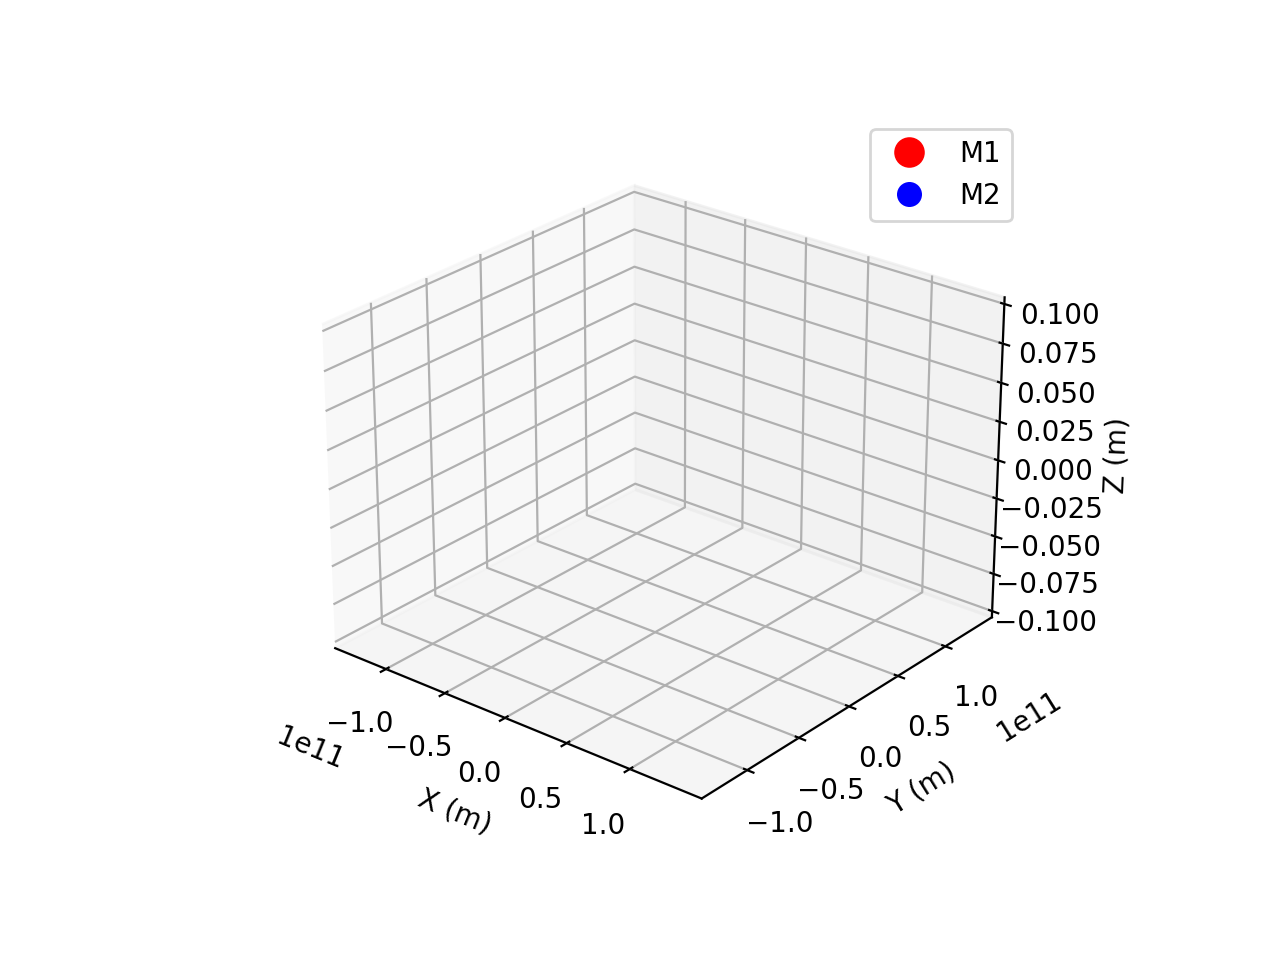

In [6]:
t_span, t_eval = time_settings()
initial_values = initial_conditions()
solution = solve_system(t_span, initial_values, t_eval, equations_of_motion_1PN)
animate_solution(solution)